In [66]:
import matplotlib.pyplot as plt
import numpy as np

In [67]:
#change the file name to correspond to your text file location
data = np.genfromtxt('./Group Project/ASTR19_F24_group_project_data.txt', dtype=[('day', 'i8'), ('time', 'U6'), ('height', 'f8')])

#empty lists to be filled with column data
day = []
time = []
height = []

for i in range(82):
    #assign first, second and third columns to day, time, and height
    day.append(data[i][0])
    time.append(data[i][1])
    height.append(data[i][2])
    
print(day)
print('')
print(time)
print('')
print(height)

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41]

['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29', '12:22

In [68]:
percents = []
for times in time:
    hourmin = times.split(':')
    percent = (float(hourmin[0]) + float(hourmin[1])/60) /24
    percents.append(percent)
daytime = [percent + daynum for percent, daynum in zip(percents, day)]

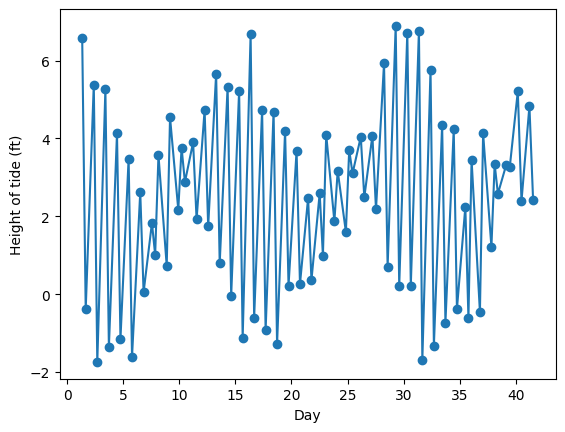

In [69]:
plt.plot(daytime, height, '-o')
plt.xlabel('Day')
plt.ylabel('Height of tide (ft)')
plt.show()

In [70]:
from scipy import optimize

In [71]:
#The function we used is a cosine function multiplied by another cosine function, which is a known way of measuring the tide over long periods of time.
#The second cosine function represents the more frequent oscillations caused by the earth's rotation (which changes the relative position of the moon),
#while the first cosine represents the greater oscillations of the amplitude, caused by the moon's elliptical orbit.
def f_line(x, a, b, c, d, e, f, g):
    return a * (1 + b * np.cos(c * x + d)) * np.cos(e * x + f) + g

print(np.max(height) - np.min(height))
params, params_cov = optimize.curve_fit(f_line, daytime, height, sigma=np.full(len(daytime), 0.25), p0=[abs(np.max(height) - np.min(height)),1.,np.pi/15,10.,2*np.pi,1.,np.mean(height)])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]
e_fit = params[4]
f_fit = params[5]
g_fit = params[6]

print(a_fit, b_fit, c_fit, d_fit, e_fit, f_fit, g_fit)

height_fit = f_line(np.array(daytime), a_fit, b_fit, c_fit, d_fit, e_fit, f_fit, g_fit)
print(height_fit)

8.629999999999999
-2.9174056575041805 -0.16983293107838124 0.211473439454815 9.09649226620139 6.282218043485752 1.4881088079069085 2.473676571517321
[ 5.51578912 -0.11835076  5.1246656  -0.50933977  4.58296479 -0.75063623
  3.94267808 -0.81759466  3.20743932 -0.73349312  2.45151637 -0.51552712
  1.63713056 -0.18544765  4.61001007  0.23109593  4.88986422  0.70658394
  5.04642194  2.75363013  5.099262    2.07453239  5.07006379  1.55821289
  4.98481174  1.1916851   4.85989916  0.9125894   4.69505994  0.67206748
  4.50821801  0.45719578  4.28700236  0.2706317   4.04219252  0.11223963
  3.75500972 -0.0307851   3.42899965 -0.14189712  3.00490942 -0.22023251
  2.46084125 -0.25315605  3.8716183  -0.23160704  4.30555035 -0.10725107
  4.74701074  3.7838115   5.19237884  2.88655388  5.56605844  2.01978372
  5.78137552  1.26882065  5.79415405  0.61286991  5.60452754  0.05024003
  5.23381675 -0.35441851  4.72712447 -0.63407991  4.10799295 -0.78603685
  3.43381339 -0.8032437   2.71028108 -0.71464958

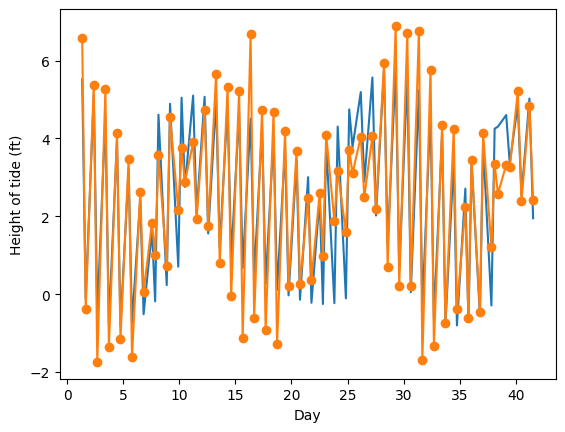

In [72]:
plt.plot(daytime, height_fit)
plt.plot(daytime, height, '-o')
plt.xlabel('Day')
plt.ylabel('Height of tide (ft)')
plt.show()

[1.0542108809786823, -0.2716492435037673, 0.2553344027423625, -1.2306602322364817, 0.6770352133083666, -0.6093637728533456, 0.18732191877988047, -0.33240534325734394, 0.272560683894997, -0.8765068798485813, 0.16848363496742635, 0.5655271236360624, 0.1928694422256636, 1.1954476531000229, -1.0400100684796638, 0.49890407476584864, -0.3498642214783496, 1.4634160622556822, -1.2864219405308148, 0.12636986718252707, -1.1992620036975823, -0.1545323937728229, -0.34006379345312876, 0.18178711094903055, 0.6751882605924093, -0.4016851001147219, 0.47010083894603216, -0.9525893998137265, 0.5349400627936092, -1.7920674763360407, 2.1617819932942606, -1.06719577510859, 0.45299763551422956, -1.200631704816829, 0.6478074802073426, -1.4022396346079953, 0.44499028126928764, 0.25078509597421417, 0.2510003508554317, 0.40189712101279773, -0.5349094211987624, 0.5802325052268135, 0.1291587479517715, 1.2431560501830028, 0.2283817019597829, 2.101607035094853, -1.135550354661893, 1.7072510724924124, -1.03701073695

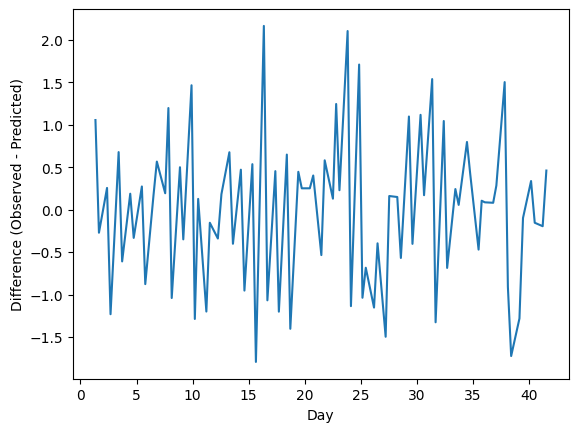

In [79]:
residuals = []
i = 0
while i < len(height):
    #subtracted the best fit from the data to get the residuals
    residuals.append(height[i] - height_fit[i])
    i += 1

# Plot of residuals
plt.plot(daytime, residuals)
plt.xlabel("Day")
plt.ylabel("Difference (Observed - Predicted)")

print(residuals)

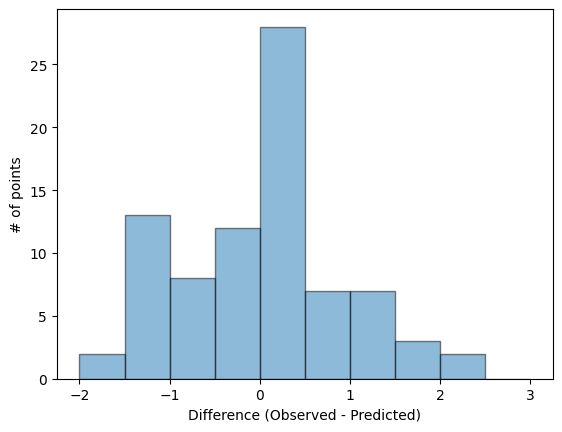

In [74]:

# Histogram of residuals
width = 0.5
histmin = np.floor(min(residuals))
histmax = np.ceil(max(residuals)) + width
bins = np.arange(histmin, histmax, width)
plt.hist(residuals, bins=bins, alpha=0.5, edgecolor='black')
plt.xlabel('Difference (Observed - Predicted)')
plt.ylabel('# of points')
plt.show()
#plt.savefig("residuals.pdf", bbox_inches="tight", facecolor="white")

In [87]:
residuals_sd = np.std(residuals)
print(f"The standard deviation of the residuals is {residuals_sd}.")

avg_diff = np.mean(residuals)
print(f"The difference on average between the obseved tidal data and the defined oscillatory function calculations is {avg_diff}.")

The standard deviation of the residuals is 2.38064082624931.
The difference on average between the obseved tidal data and the defined oscillatory function calculations is -9.062304768392155e-10.


In [88]:
# Finding the intrinsic scatter, given by the equation of 
# [intrinsic_scatter]^2 = [observational_scatter]^2 - [observational_error_scatter]^2
in_scatter = np.sqrt(np.var(height) - 0.25 ** 2)
print(f"The intrinsic scatter is {in_scatter}.")

2.367477717657549


In [ ]:
residuals.append(2)

width = 0.5
histmin = np.floor(min(residuals))
histmax = np.ceil(max(residuals)) + width
bins = np.arange(histmin, histmax, width)
plt.hist(residuals, bins=bins, alpha=0.5, edgecolor='black')
plt.xlabel('Difference (Observed - Predicted)')
plt.ylabel('# of points')
plt.show()

In [ ]:
print(f'The new 2ft outlier is about {(2 - np.mean(residuals)) / np.std(residuals)} standard deviations away from the model.')